# Cat-Dog Classification

data received from [Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765)

# Imports

In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.19.0


# Take in the images and label them dog and cat

In [3]:
X = []
y = []

# load all dog data
for img_name in os.listdir("Data/Dog"):
    img_path = os.path.join("Data/Dog", img_name)

    #re-size images to 64 by 64
    img = Image.open(img_path).convert("RGB").resize((64, 64))
    img = np.array(img) / 255.0

    # add images to arrays
    X.append(img)
    y.append("Dog")

# load all cat data
for img_name in os.listdir("Data/Cat"):
    img_path = os.path.join("Data/Cat", img_name)

    #re-size images to 64 by 64
    img = Image.open(img_path).convert("RGB").resize((64, 64))
    img = np.array(img) / 255.0

    # add images to arrays
    X.append(img)
    y.append("cat")

X = np.array(X)
y = np.array(y)

C:\Users\kelan\OneDrive\Documents\GitHub\Cat-Dog-Classification\venv\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


# Encode and split the data into test and training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# get validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)

# Create CNN Model

In [5]:
# Specify the number of filters and their sizes
# Dropout randomly drops half the neurons form the dense call (prevents overfitting)
# Dense 1 is classification of cat or dog

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\kelan\OneDrive\Documents\GitHub\Cat-Dog-Classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model
- x_train = image data
- y_train = labels
- epochs = number of times trained

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.5871 - loss: 0.6765 - val_accuracy: 0.6852 - val_loss: 0.5803
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.7182 - loss: 0.5570 - val_accuracy: 0.7673 - val_loss: 0.4834
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7797 - loss: 0.4716 - val_accuracy: 0.7648 - val_loss: 0.4910
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8074 - loss: 0.4150 - val_accuracy: 0.8095 - val_loss: 0.4387
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8320 - loss: 0.3678 - val_accuracy: 0.8045 - val_loss: 0.4380
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.8617 - loss: 0.3265 - val_accuracy: 0.8260 - val_loss: 0.4223
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.8878 - loss: 0.2612 - val_accuracy: 0.8108 - val_loss: 0.4517
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9086 - loss: 0.2183 - 

# plot a graph to show the accuracy over the epochs

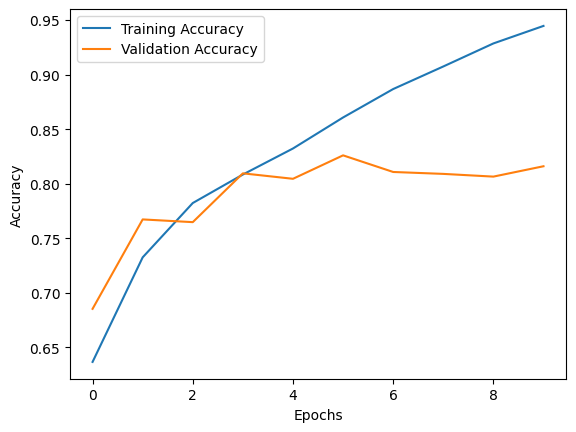

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to check new image

In [15]:
def predict_image(img_name, model):
    img_path = os.path.join("Data/UserInput", img_name)
    img = Image.open(img_path).convert("RGB").resize((64, 64))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = 'dog' if prediction < 0.5 else 'cat'
    return predicted_class

In [16]:
imageName = 'sitting_luna.jpg'
predicted_class = predict_image(imageName, model)
print(f"Predicted animal type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted animal type: dog
